In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
breast_cancer_df = pd.read_csv('/Users/diegobolanos/Downloads/breast_cancer.csv')
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


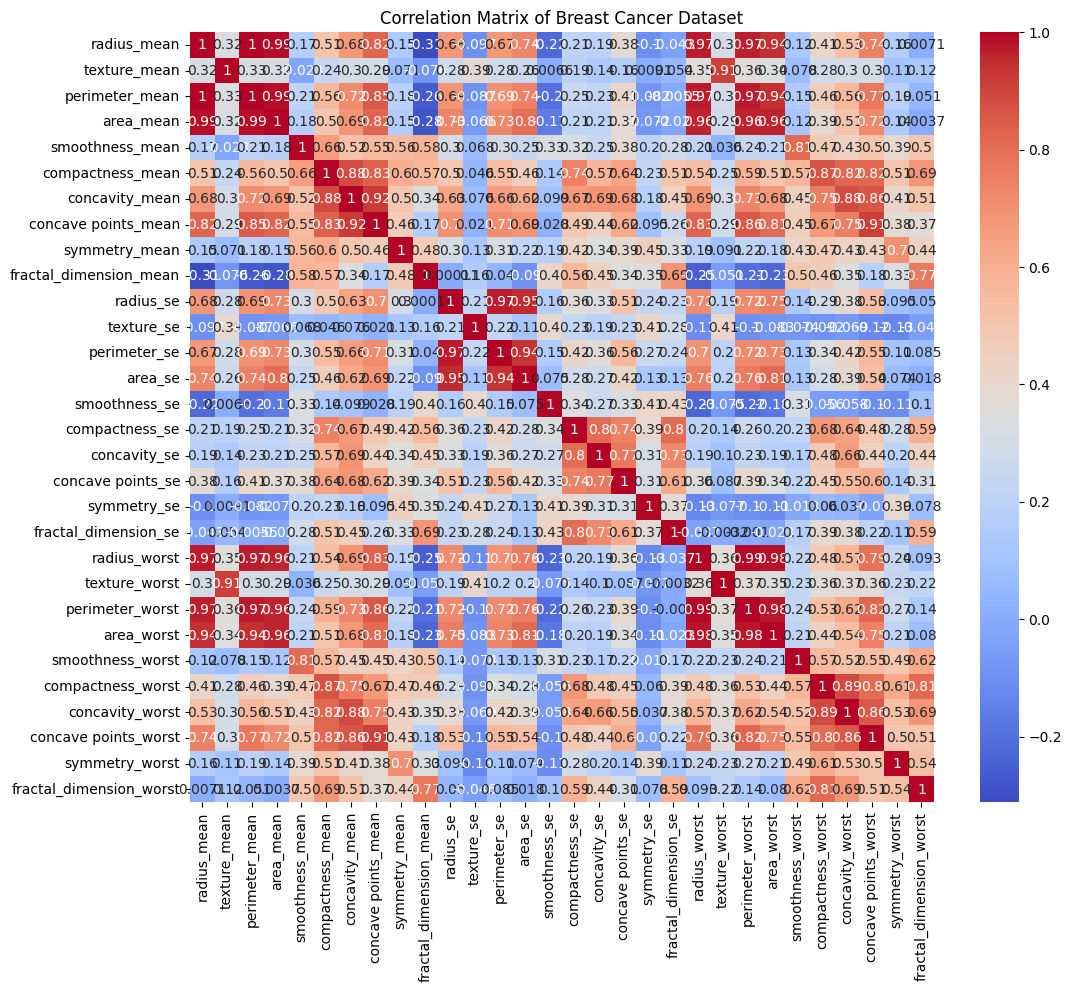

perimeter_mean        radius_mean             0.997855
radius_mean           perimeter_mean          0.997855
perimeter_worst       radius_worst            0.993708
radius_worst          perimeter_worst         0.993708
radius_mean           area_mean               0.987357
area_mean             radius_mean             0.987357
                      perimeter_mean          0.986507
perimeter_mean        area_mean               0.986507
area_worst            radius_worst            0.984015
radius_worst          area_worst              0.984015
perimeter_worst       area_worst              0.977578
area_worst            perimeter_worst         0.977578
radius_se             perimeter_se            0.972794
perimeter_se          radius_se               0.972794
perimeter_worst       perimeter_mean          0.970387
perimeter_mean        perimeter_worst         0.970387
radius_worst          radius_mean             0.969539
radius_mean           radius_worst            0.969539
perimeter_

In [16]:
# Select only numeric columns for correlation matrix
numerical_features = breast_cancer_df.drop(columns=['id', 'diagnosis'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Dataset')
plt.show()

# Get the pairs with the highest correlation
pairs = correlation_matrix.unstack()
sorted_pairs = pairs.sort_values(kind="quicksort", ascending=False)

# Print pairs with high correlation from 0.9 to 1
sorted_pairs[(sorted_pairs > 0.9) & (sorted_pairs < 1)]

The heatmap shows the correlation between each pair of features in a range from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the features. On the other hand,the variables have a strong negative correlation. It's important to note that the diagonal line is the correlation of each feature with itself, which has a value of 1.

In [11]:
from sklearn.model_selection import train_test_split

# Set the columns to be dropped
columns=['id', 'diagnosis']
# Map the diagnosis values to be numeric (M: 1, B: 0)
diagnosis_mapped = breast_cancer_df['diagnosis'].map({'M': 1, 'B': 0})

X = breast_cancer_df.drop(columns=columns)
y = diagnosis_mapped

# Spli the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # 5 different values for the "C" parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # kernels to be compared
    'degree': [2, 3]  # Degree parameters for poly kernel
}

The C parameter in SVMs is used to adjust the strictness of the model. A higher C value means that is a more strict model. Thus, the model will try to classify all data points correctly, if not, it will allow some misclassifications.

The kernel parameter plays an important role determining the linearity of the SVM model, and is used to transform the data into a higher dimensional space. If the kernel is linear, then the dat is likely linearly separable, if the kernel is rbf, poly, or sigmoid, then the data could be non-linearly separable.

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create an SVC model
svc_model = SVC()

# Apply GridSearchCV function with 5-fold cross validation and the kernel types
grid_search_cv = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data
grid_search_cv.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search_cv.best_estimator_

# Predict on the validation set using the best model
y_pred = best_estimator.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate and print the classification report which includes precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

